In [1]:
!pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.5/813.5 kB 2.5 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-learn-extra: filename=scikit_learn_extra-0.2.0-cp310-cp310-linux_x86_64.whl size=1708165 sha256=8957fd555bf955409efeef3aadf9fda0f10fcb4bf26f882112c276bfd7eba1a1
  Stored in directory: /home/quocthanh/.cache/pip/wheels/9e/d0/ec/2f4b6fa3c830210eb0577d95f84a28e40e0fbc7479548b946a
Successfully built scikit-learn-extra


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score

In [3]:
df = pd.read_csv('wine-clustering.csv')

In [4]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [6]:
df.nunique()

Alcohol                 126
Malic_Acid              133
Ash                      79
Ash_Alcanity             63
Magnesium                53
Total_Phenols            97
Flavanoids              132
Nonflavanoid_Phenols     39
Proanthocyanins         101
Color_Intensity         132
Hue                      78
OD280                   122
Proline                 121
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [8]:
## Visualization

Alcohol
Skew : -0.05


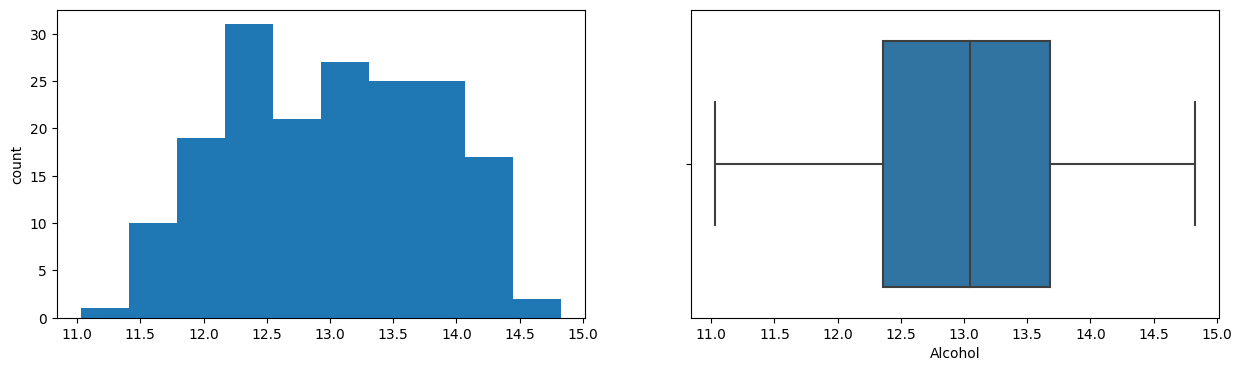

Malic_Acid
Skew : 1.04


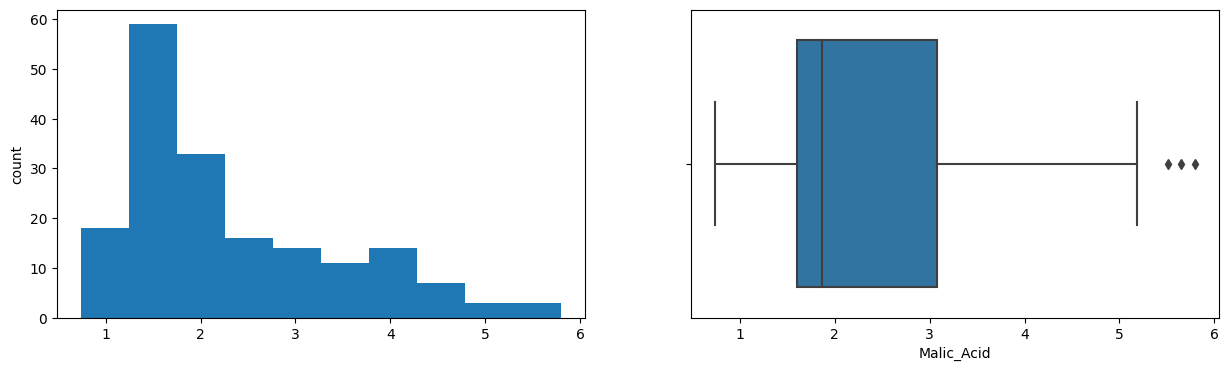

Ash
Skew : -0.18


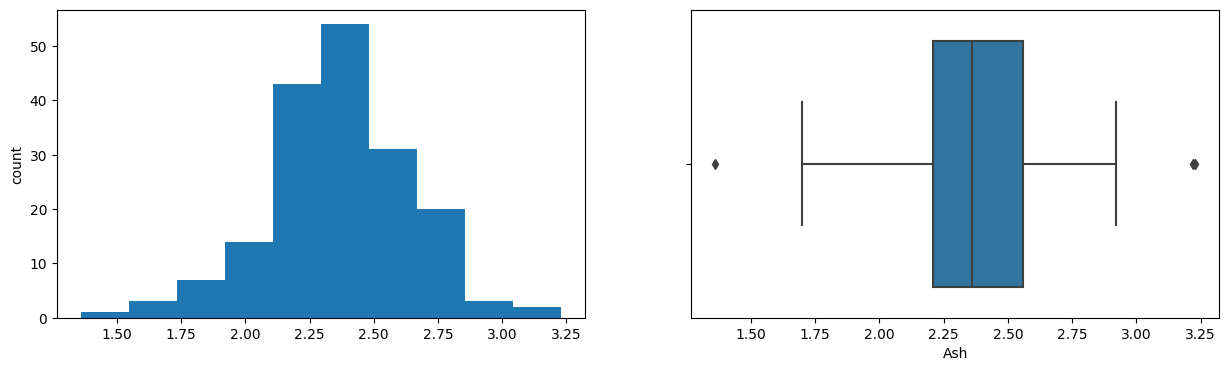

Ash_Alcanity
Skew : 0.21


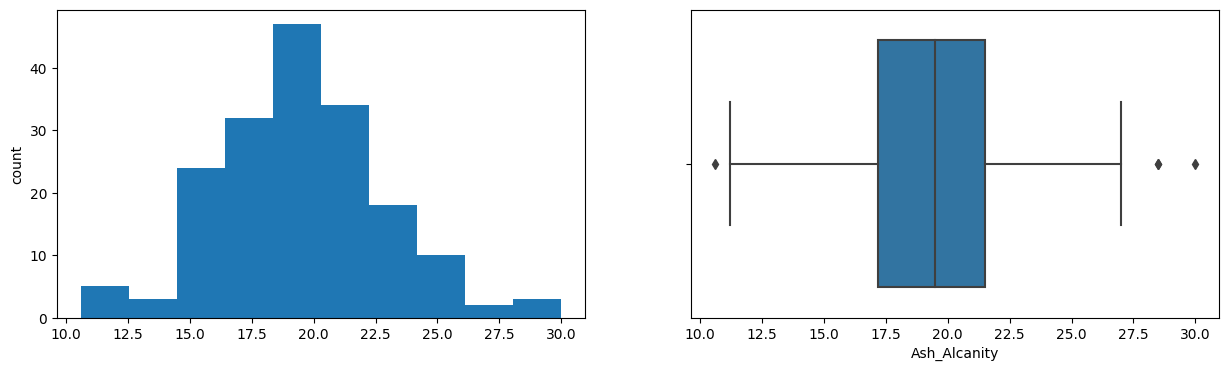

Magnesium
Skew : 1.1


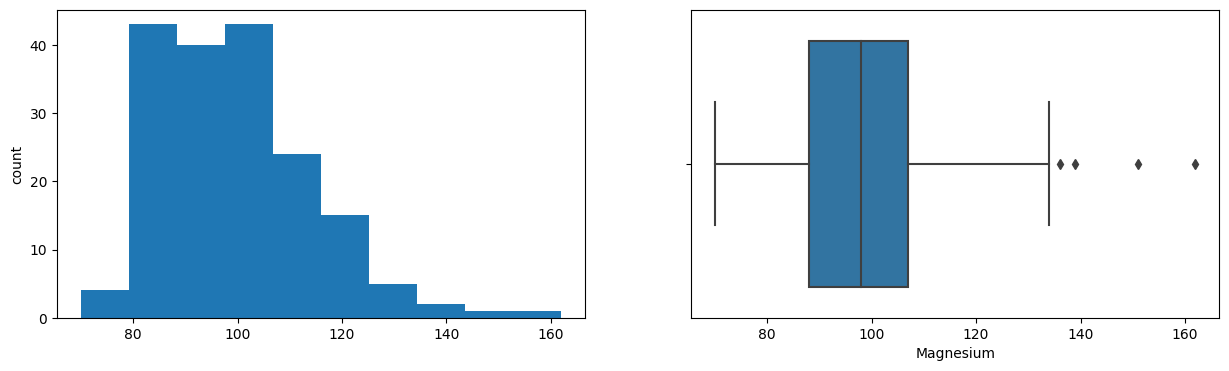

Total_Phenols
Skew : 0.09


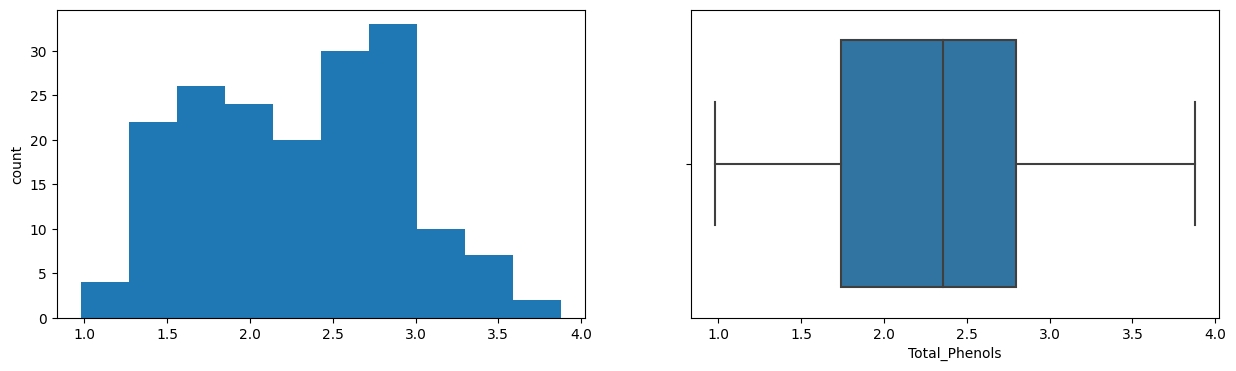

Flavanoids
Skew : 0.03


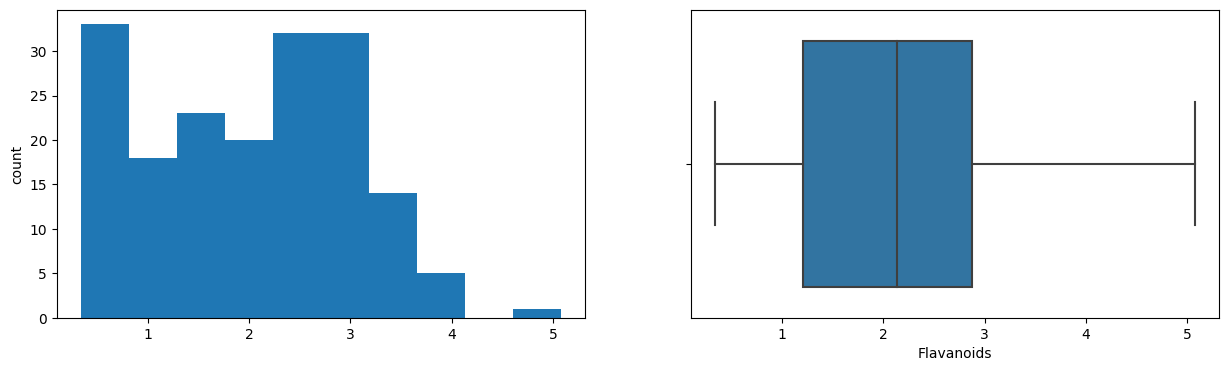

Nonflavanoid_Phenols
Skew : 0.45


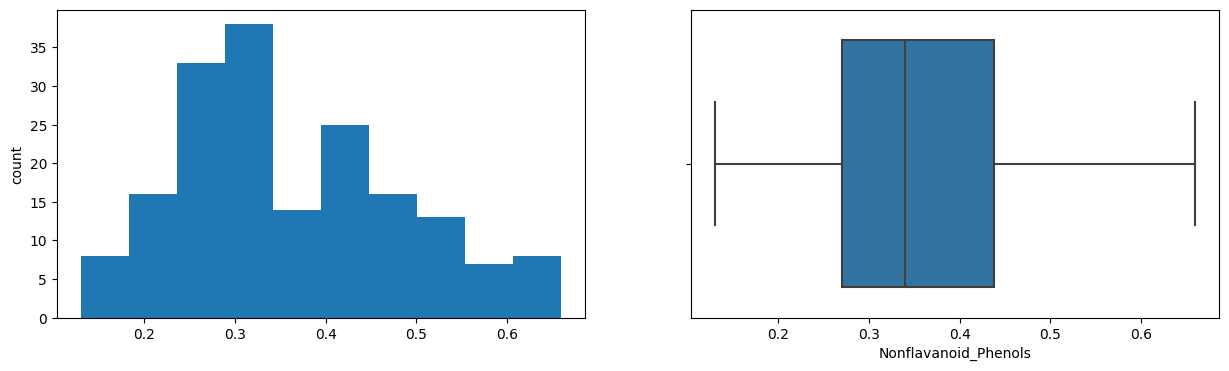

Proanthocyanins
Skew : 0.52


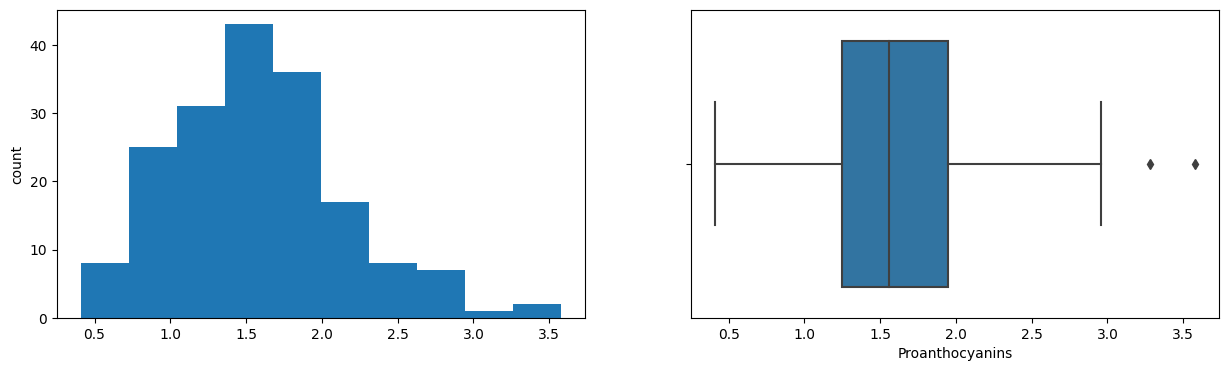

Color_Intensity
Skew : 0.87


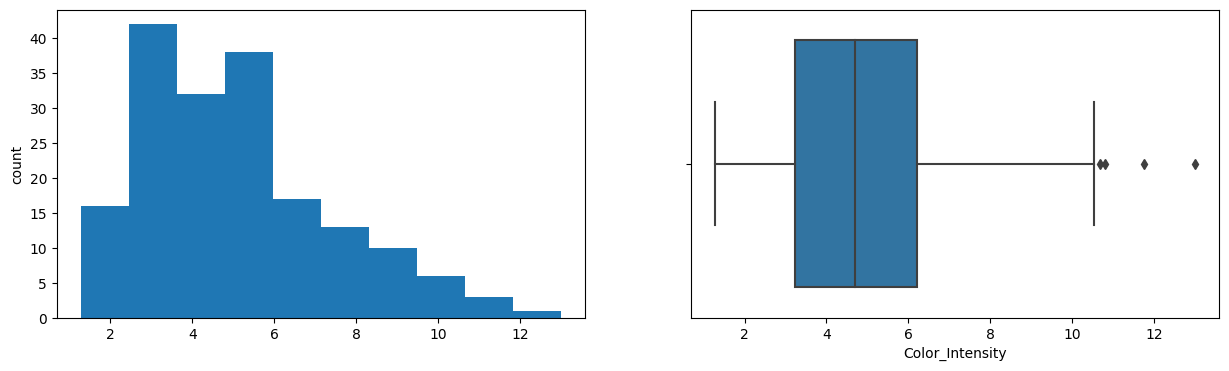

Hue
Skew : 0.02


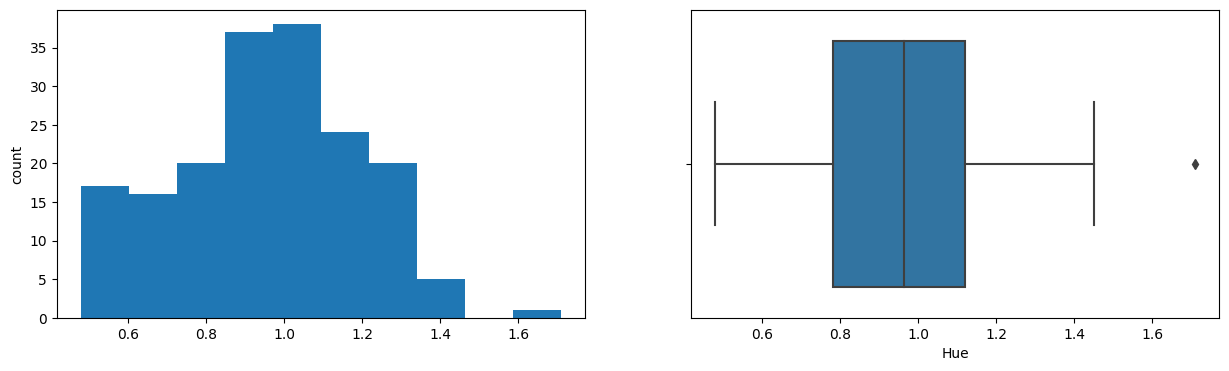

OD280
Skew : -0.31


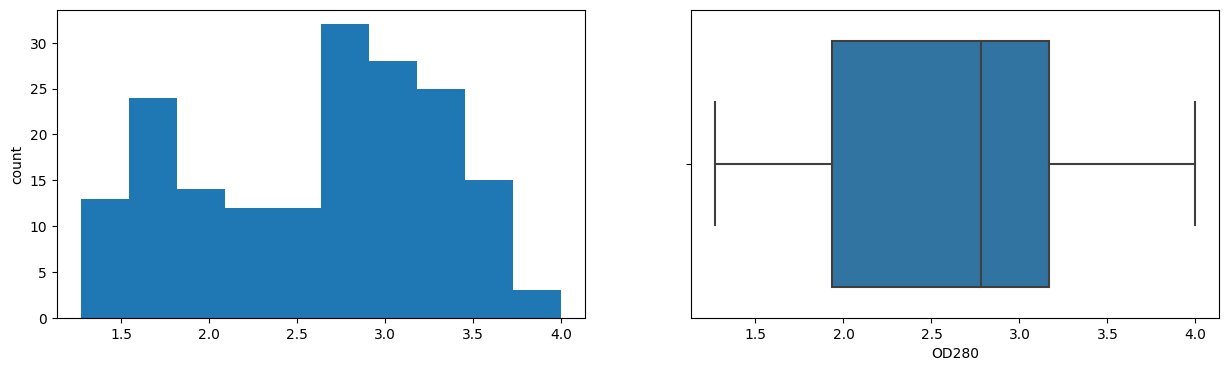

Proline
Skew : 0.77


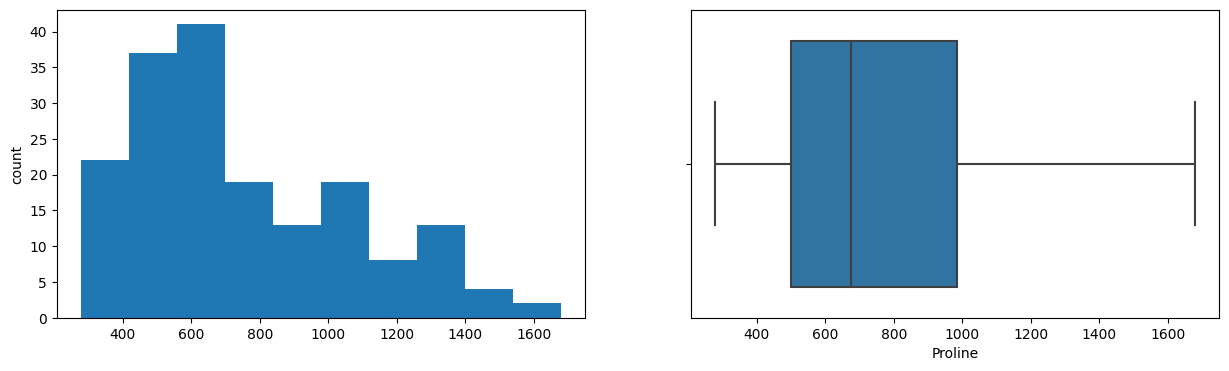

In [9]:
for col in df.columns:
    print(col)
    print('Skew :',round(df[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    df[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.show()

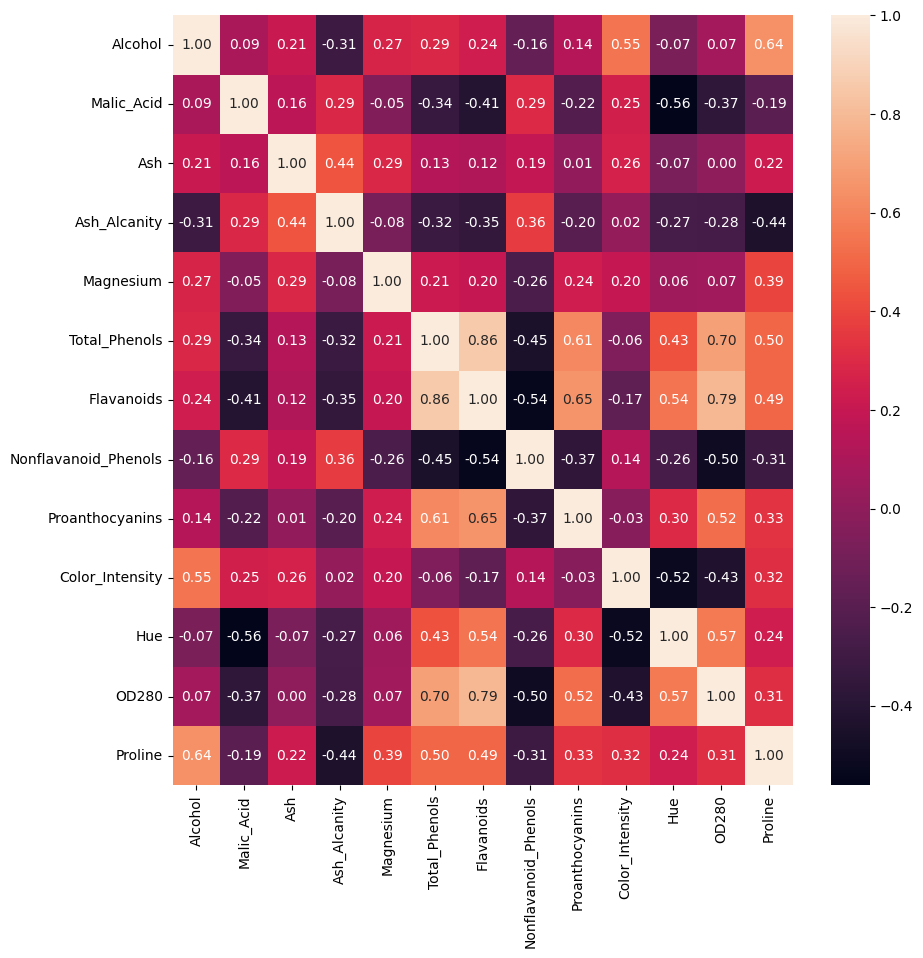

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt='0.2f')
plt.show()

clustering

In [11]:
scaler=StandardScaler()
df_scaled=pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [12]:
df_scaled.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [13]:
df_scaled_copy = df_scaled.copy(deep=True)

K-Means

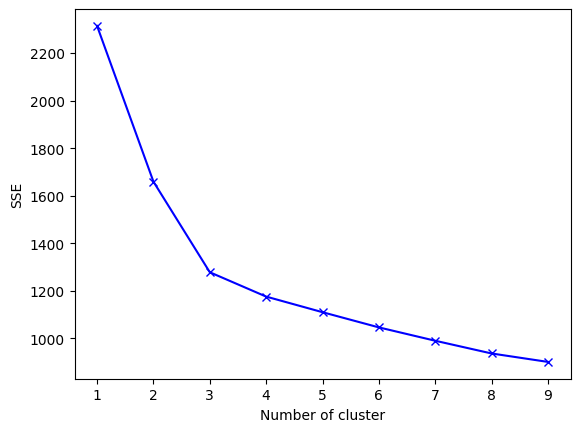

In [14]:
sse = {} 
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=1).fit(df_scaled)
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [15]:
kmeans = KMeans(n_clusters=3, max_iter= 1000, random_state=1)
kmeans.fit(df_scaled)
 
df_scaled_copy['Labels'] = kmeans.predict(df_scaled)
df['Labels'] = kmeans.predict(df_scaled)
df.Labels.value_counts()

0    65
2    62
1    51
Name: Labels, dtype: int64

In [16]:
mean = df.groupby('Labels').mean()
median = df.groupby('Labels').median()
df_kmeans = pd.concat([mean, median], axis=0)
df_kmeans.index = ['clus_0 Mean', 'clus_1 Mean', 'clus_2 Mean', 'clus_0 Median', 'clus_1 Median', 'clus_2 Median']
df_kmeans.T

,clus_0 Mean,clus_1 Mean,clus_2 Mean,clus_0 Median,clus_1 Median,clus_2 Median
Alcohol,12.250923,13.134118,13.676774,12.25,13.11,13.735
Malic_Acid,1.897385,3.307255,1.997903,1.61,3.27,1.765
Ash,2.231231,2.417647,2.466290,2.24,2.38,2.445
Ash_Alcanity,20.063077,21.241176,17.462903,20.00,21.00,17.000
Magnesium,92.738462,98.666667,107.967742,88.00,97.00,105.500
Total_Phenols,2.247692,1.683922,2.847581,2.20,1.65,2.825
Flavanoids,2.050000,0.818824,3.003226,2.03,0.70,2.975
Nonflavanoid_Phenols,0.357692,0.451961,0.292097,0.35,0.47,0.290
Proanthocyanins,1.624154,1.145882,1.922097,1.56,1.10,1.895
Color_Intensity,2.973077,7.234706,5.453548,2.90,7.30,5.400


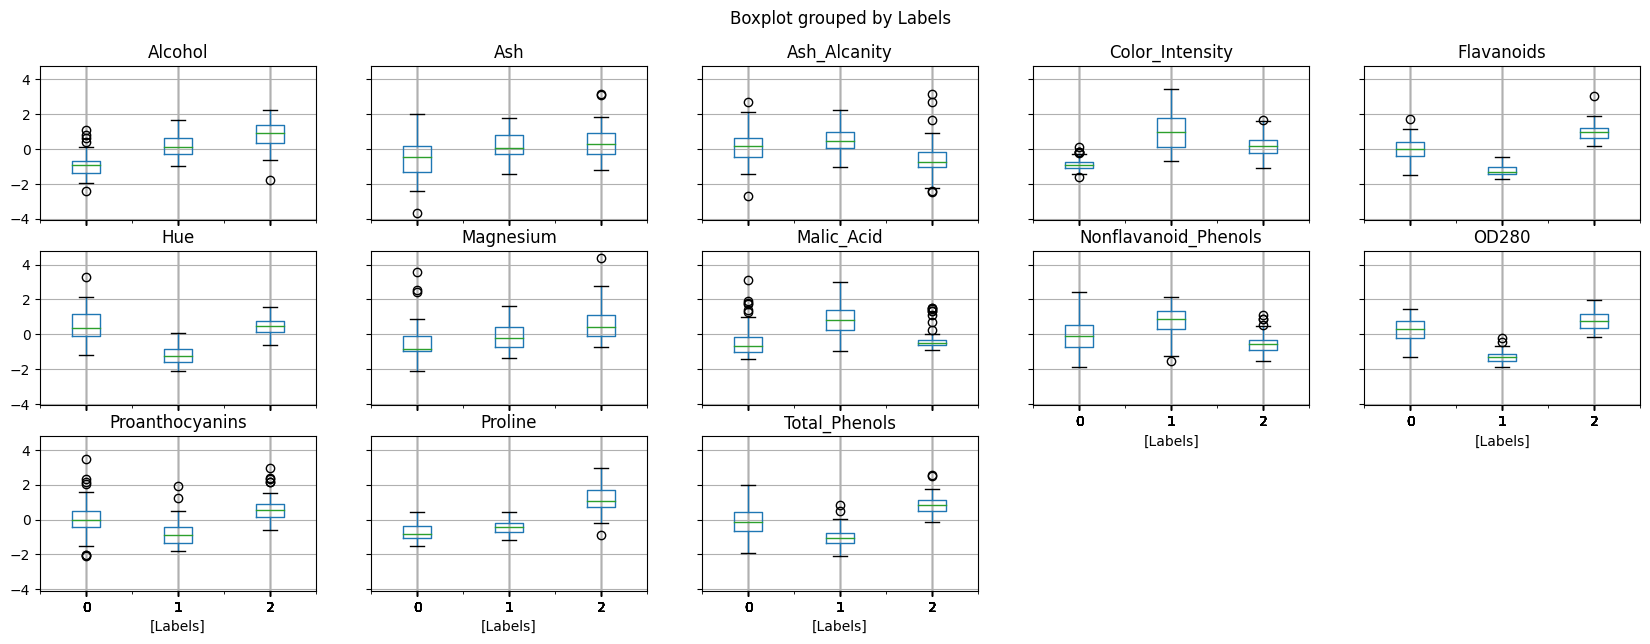

In [17]:
df_scaled_copy.boxplot(by = 'Labels', layout = (3,5),figsize=(20,7))
plt.show()

K-Medoids

In [18]:
original_features = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Labels']

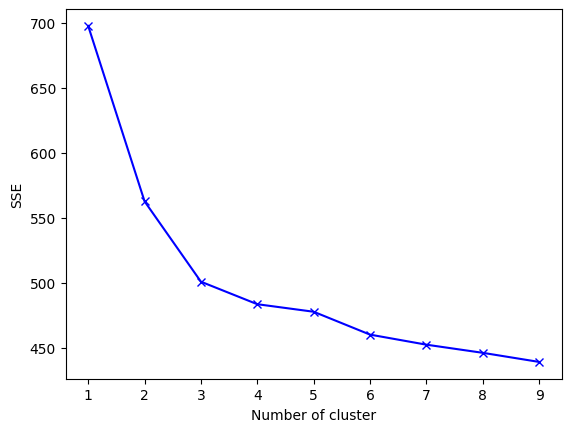

In [19]:
sse = {} 

for k in range(1, 10):
    kmedo = KMedoids(n_clusters=k, max_iter=1000, random_state=1).fit(df_scaled)
    sse[k] = kmedo.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [20]:
kmedo = KMedoids(n_clusters = 3, random_state=1)
kmedo.fit(df_scaled)

df_scaled_copy['kmedoLabels'] = kmedo.predict(df_scaled)
df['kmedoLabels'] = kmedo.predict(df_scaled)
df.kmedoLabels.value_counts()

2    73
1    54
0    51
Name: kmedoLabels, dtype: int64

In [21]:
mean = df.groupby('kmedoLabels').mean()
median = df.groupby('kmedoLabels').median()
df_kmedoids = pd.concat([mean, median], axis=0)
df_kmedoids.index = ['clus_0 Mean', 'clus_1 Mean', 'clus_2 Mean', 'clus_0 Median', 'clus_1 Median', 'clus_2 Median']
df_kmedoids[original_features].T

,clus_0 Mean,clus_1 Mean,clus_2 Mean,clus_0 Median,clus_1 Median,clus_2 Median
Alcohol,13.110980,12.282593,13.454658,13.11,12.290,13.64
Malic_Acid,3.341765,1.827778,2.010137,3.27,1.610,1.75
Ash,2.446471,2.190556,2.440822,2.38,2.215,2.42
Ash_Alcanity,21.539216,19.759259,17.871233,21.50,19.550,17.20
Magnesium,99.764706,90.388889,106.643836,97.00,88.000,103.00
Total_Phenols,1.686863,2.107778,2.858630,1.65,2.100,2.85
Flavanoids,0.827843,1.910000,2.956849,0.70,1.885,2.92
Nonflavanoid_Phenols,0.444314,0.386481,0.286027,0.47,0.370,0.28
Proanthocyanins,1.181569,1.464259,1.970548,1.14,1.435,1.95
Color_Intensity,7.145098,2.975185,5.140822,7.30,2.900,5.10


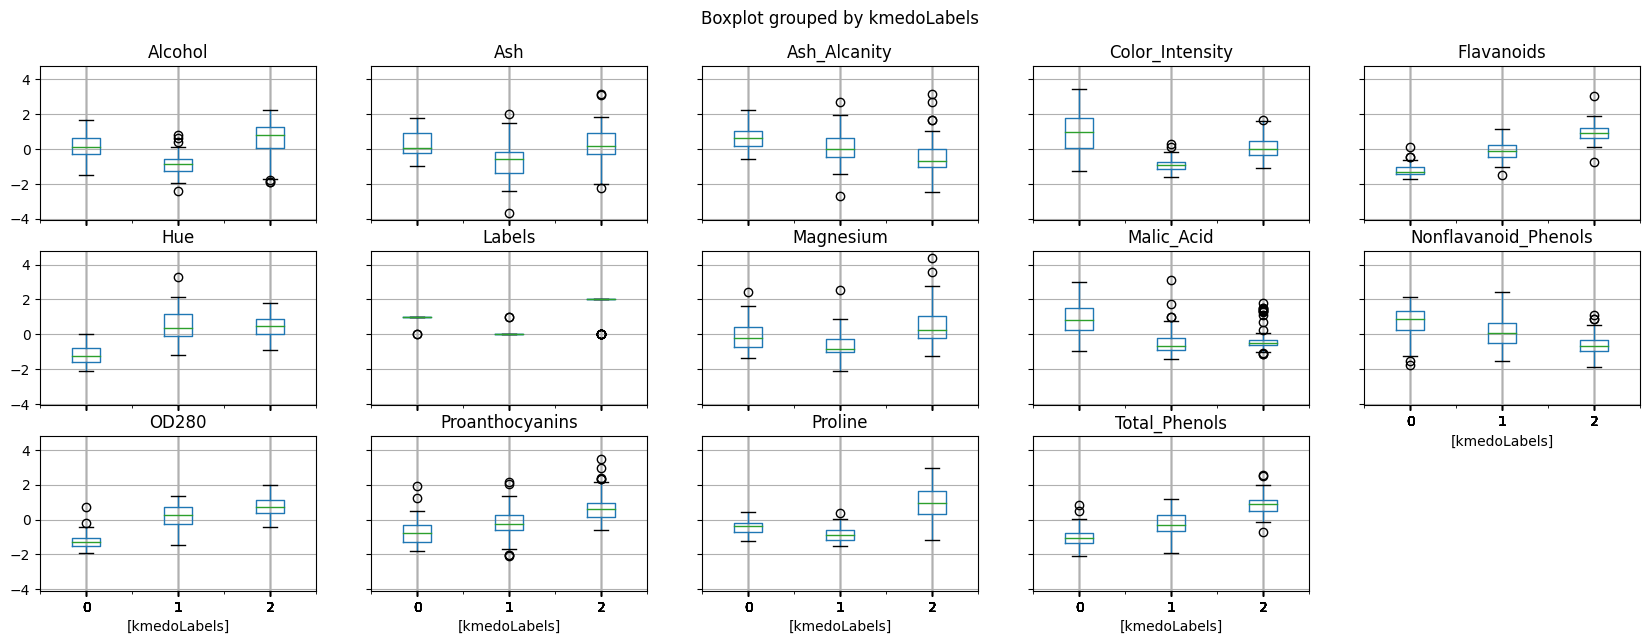

In [22]:
features_with_lables = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Labels', 'kmedoLabels']

df_scaled_copy[features_with_lables].boxplot(by = 'kmedoLabels', layout = (3,5),figsize=(20,7))
plt.show()

K-Means vs K-Medoids

In [23]:
comparison = pd.concat([df_kmedoids, df_kmeans], axis=1)[original_features]
comparison.T

,clus_0 Mean,clus_1 Mean,clus_2 Mean,clus_0 Median,clus_1 Median,clus_2 Median
Alcohol,13.110980,12.282593,13.454658,13.11,12.290,13.640
Alcohol,12.250923,13.134118,13.676774,12.25,13.110,13.735
Malic_Acid,3.341765,1.827778,2.010137,3.27,1.610,1.750
Malic_Acid,1.897385,3.307255,1.997903,1.61,3.270,1.765
Ash,2.446471,2.190556,2.440822,2.38,2.215,2.420
Ash,2.231231,2.417647,2.466290,2.24,2.380,2.445
Ash_Alcanity,21.539216,19.759259,17.871233,21.50,19.550,17.200
Ash_Alcanity,20.063077,21.241176,17.462903,20.00,21.000,17.000
Magnesium,99.764706,90.388889,106.643836,97.00,88.000,103.000
Magnesium,92.738462,98.666667,107.967742,88.00,97.000,105.500


PCA và ánh xạ của K-Means và K-Medoids

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df_scaled)

PCA(n_components=2)

In [25]:
feature = pca.transform(df_scaled)

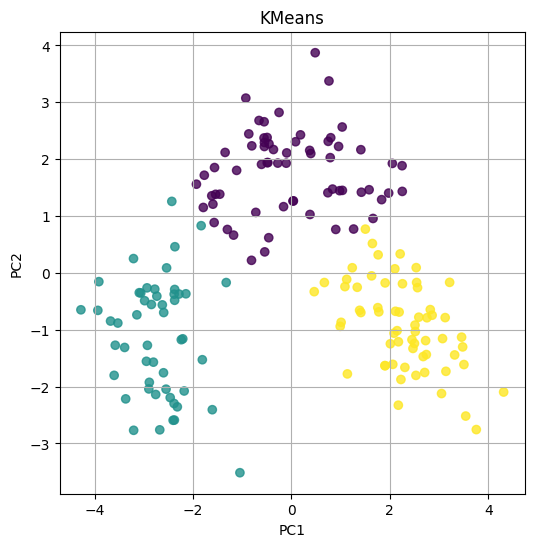

In [26]:
plt.figure(figsize=(6, 6))
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, c=list(df.iloc[:, 13]))
plt.grid()
plt.title('KMeans')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


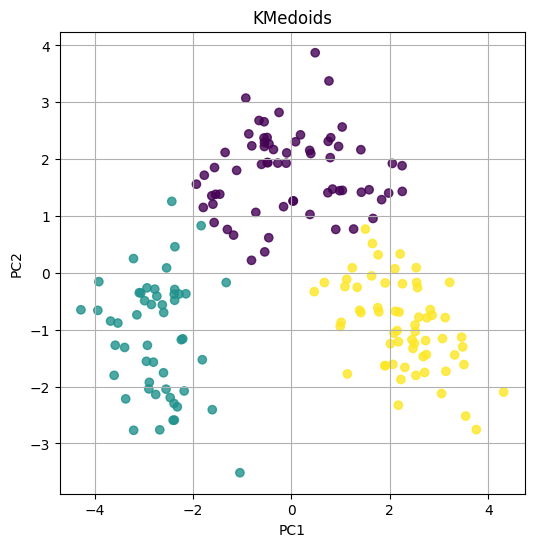

In [27]:
plt.figure(figsize=(6, 6))
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, c=list(df.iloc[:, 13]))
plt.grid()
plt.title('KMedoids')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()